# BCG Virtual Internship - Task 4: Model Building & Evaluation

## Done By: Soorya Parthiban
LinkedIn: https://www.linkedin.com/in/sooryaprakashparthiban/

## Importing the required libraries

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Importing the dataset

In [7]:
customer_df = pd.read_csv('BCG-Customer-BestFeatures.csv')

In [9]:
customer_df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
customer_df.head()

,id,margin_gross_pow_ele,num_years_antig,margin_net_pow_ele,ChSales_lmkebamcaaclubfxadlmueccxoimlema,cons_12m,cons_last_month,ChSales_foosdfpfkusacimwkcsosbicdxkicaua,cons_gas_12m,price_p3_fix,...,forecast_meter_rent_12m,net_margin,forecast_price_energy_p2,price_p2_var,nb_prod_act,forecast_discount_energy,ChSales_ewpakwlliwisiwduibdlfmalxowmwpci,pow_max,ChSales_sddiedcslfslkckwlfkdpoeeailfpeds,churn
0,038af19179925da21a25619c5a24b745,21.52,3,21.52,0,3576,630,1,0,0.0,...,19.59,52.53,0.0,0.0,1,0.0,0,13.2,0,0
1,038af19179925da21a25619c5a24b745,21.52,3,21.52,0,3576,630,1,0,0.0,...,19.59,52.53,0.0,0.0,1,0.0,0,13.2,0,0
2,038af19179925da21a25619c5a24b745,21.52,3,21.52,0,3576,630,1,0,0.0,...,19.59,52.53,0.0,0.0,1,0.0,0,13.2,0,0
3,038af19179925da21a25619c5a24b745,21.52,3,21.52,0,3576,630,1,0,0.0,...,19.59,52.53,0.0,0.0,1,0.0,0,13.2,0,0
4,038af19179925da21a25619c5a24b745,21.52,3,21.52,0,3576,630,1,0,0.0,...,19.59,52.53,0.0,0.0,1,0.0,0,13.2,0,0


In [11]:
customer_df.tail()

,id,margin_gross_pow_ele,num_years_antig,margin_net_pow_ele,ChSales_lmkebamcaaclubfxadlmueccxoimlema,cons_12m,cons_last_month,ChSales_foosdfpfkusacimwkcsosbicdxkicaua,cons_gas_12m,price_p3_fix,...,forecast_meter_rent_12m,net_margin,forecast_price_energy_p2,price_p2_var,nb_prod_act,forecast_discount_energy,ChSales_ewpakwlliwisiwduibdlfmalxowmwpci,pow_max,ChSales_sddiedcslfslkckwlfkdpoeeailfpeds,churn
192997,16f51cdc2baa19af0b940ee1b3dd17d5,13.8,3,13.8,0,26272,2505,1,0,16.291555,...,129.61,325.43,0.100572,0.102232,1,0.0,0,15.1,0,0
192998,16f51cdc2baa19af0b940ee1b3dd17d5,13.8,3,13.8,0,26272,2505,1,0,16.291555,...,129.61,325.43,0.100572,0.102232,1,0.0,0,15.1,0,0
192999,16f51cdc2baa19af0b940ee1b3dd17d5,13.8,3,13.8,0,26272,2505,1,0,16.291555,...,129.61,325.43,0.100572,0.102232,1,0.0,0,15.1,0,0
193000,16f51cdc2baa19af0b940ee1b3dd17d5,13.8,3,13.8,0,26272,2505,1,0,16.291555,...,129.61,325.43,0.100572,0.102232,1,0.0,0,15.1,0,0
193001,16f51cdc2baa19af0b940ee1b3dd17d5,13.8,3,13.8,0,26272,2505,1,0,16.291555,...,129.61,325.43,0.100572,0.102232,1,0.0,0,15.1,0,0


In [19]:
customer_df.isnull().sum()

id                                          0
margin_gross_pow_ele                        0
num_years_antig                             0
margin_net_pow_ele                          0
ChSales_lmkebamcaaclubfxadlmueccxoimlema    0
cons_12m                                    0
cons_last_month                             0
ChSales_foosdfpfkusacimwkcsosbicdxkicaua    0
cons_gas_12m                                0
price_p3_fix                                0
price_p3_var                                0
price_p2_fix                                0
has_gas_                                    0
forecast_meter_rent_12m                     0
net_margin                                  0
forecast_price_energy_p2                    0
price_p2_var                                0
nb_prod_act                                 0
forecast_discount_energy                    0
ChSales_ewpakwlliwisiwduibdlfmalxowmwpci    0
pow_max                                     0
ChSales_sddiedcslfslkckwlfkdpoeeai

In [56]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 23 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   id                                        193002 non-null  object 
 1   margin_gross_pow_ele                      193002 non-null  float64
 2   num_years_antig                           193002 non-null  int64  
 3   margin_net_pow_ele                        193002 non-null  float64
 4   ChSales_lmkebamcaaclubfxadlmueccxoimlema  193002 non-null  int64  
 5   cons_12m                                  193002 non-null  int64  
 6   cons_last_month                           193002 non-null  int64  
 7   ChSales_foosdfpfkusacimwkcsosbicdxkicaua  193002 non-null  int64  
 8   cons_gas_12m                              193002 non-null  int64  
 9   price_p3_fix                              193002 non-null  float64
 10  price_p3_var        

In [57]:
customer_df['churn'].value_counts()

0    173893
1     19109
Name: churn, dtype: int64

## Building the ML Models

In [22]:
X = customer_df.drop(['churn', 'id'], axis=1)
y = customer_df['churn']

In [23]:
# Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train and Validation Set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 

### XGBoost Classifier

In [24]:
from xgboost import XGBClassifier

In [25]:
xgb = XGBClassifier(objective='binary:logistic')

In [26]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
print("XGB model's score: ", xgb.score(X_test, y_test))

XGB model's score:  0.9520737804720085


In [29]:
y_preds_xgb = xgb.predict(X_test)

In [30]:
print("XGB model's accuracy: ", accuracy_score(y_test, y_preds_xgb))

XGB model's accuracy:  0.9520737804720085


In [32]:
print("XGB model's Classification Report: \n \n", classification_report(y_test, y_preds_xgb))

XGB model's Classification Report: 
 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     34826
           1       1.00      0.51      0.68      3775

    accuracy                           0.95     38601
   macro avg       0.97      0.76      0.83     38601
weighted avg       0.95      0.95      0.94     38601



### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc = RandomForestClassifier(n_estimators=1500, bootstrap= True, max_depth= 70, max_features= 'auto', min_samples_leaf= 4,
min_samples_split= 10)

In [40]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=1500)

In [41]:
print("Random Forest Classifier model's score: ", rfc.score(X_test, y_test))

Random Forest Classifier model's score:  0.9961659024377607


In [42]:
y_preds_rfc = rfc.predict(X_test)

In [43]:
print("Random Forest Classifier model's accuracy: ", accuracy_score(y_test, y_preds_rfc))

Random Forest Classifier model's accuracy:  0.9961659024377607


In [44]:
print("Random Forest Classifier model's Classification Report: \n \n", classification_report(y_test, y_preds_rfc))

Random Forest Classifier model's Classification Report: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     34826
           1       1.00      0.96      0.98      3775

    accuracy                           1.00     38601
   macro avg       1.00      0.98      0.99     38601
weighted avg       1.00      1.00      1.00     38601



## Evaluating the Models on Validation Set

### XGB Model on Validation Set (New Data)

In [45]:
y_val_xgb = xgb.predict(X_val)

In [52]:
print("XGB validation score: ", accuracy_score(y_val, y_val_xgb))

XGB validation score:  0.9527991502810808


In [55]:
print("XGB model's Classification Report on Validation Set: \n \n", classification_report(y_val, y_preds_xgb))

XGB model's Classification Report on Validation Set: 
 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93     34809
           1       0.10      0.05      0.07      3792

    accuracy                           0.86     38601
   macro avg       0.50      0.50      0.50     38601
weighted avg       0.82      0.86      0.84     38601



Text(0.5, 1.0, 'Confusion Matrix for XGB Model on Validation Set')

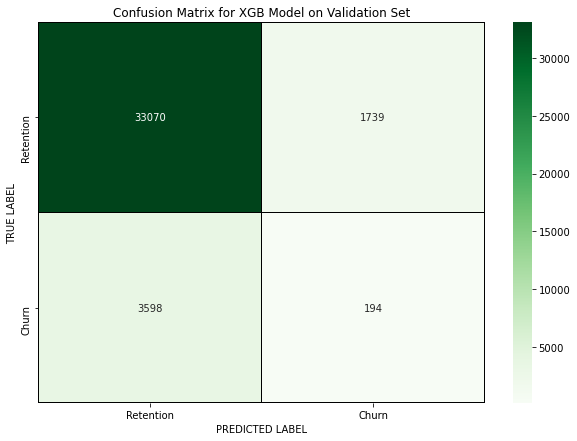

In [58]:
#Confusion Matrix of XGB.
cm = confusion_matrix(y_val, y_preds_xgb)

x_axis_labels = ["Retention", "Churn"]
y_axis_labels = ["Retention", "Churn"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGB Model on Validation Set')

### Random Forest Classifier Model on Validation Set (New Data)

In [59]:
y_val_rfc = rfc.predict(X_val)

In [60]:
print("Random Forest Clasifier validation score: ", accuracy_score(y_val, y_val_rfc))

Random Forest Clasifier validation score:  0.9965026812776872


In [61]:
print("Random Forest Clasifier model's Classification Report on Validation Set: \n \n", classification_report(y_val, y_preds_rfc))

Random Forest Clasifier model's Classification Report on Validation Set: 
 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90     34809
           1       0.10      0.09      0.10      3792

    accuracy                           0.83     38601
   macro avg       0.50      0.50      0.50     38601
weighted avg       0.82      0.83      0.82     38601



Text(0.5, 1.0, 'Confusion Matrix for Random Forest Clasifier Model on Validation Set')

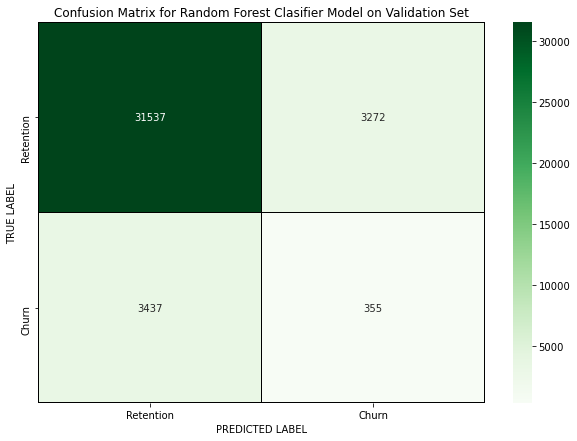

In [62]:
#Confusion Matrix of Random Forest Clasifier.
cm_rfc = confusion_matrix(y_val, y_preds_rfc)

x_axis_labels = ["Retention", "Churn"]
y_axis_labels = ["Retention", "Churn"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm_rfc, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Clasifier Model on Validation Set')

## Checking the important features

In [63]:
print(rfc.feature_importances_)

[9.80207108e-02 3.87669151e-02 9.71936081e-02 5.03453492e-03
 1.40718612e-01 1.04255879e-01 1.02188352e-02 2.70220456e-02
 6.34526453e-03 2.12536533e-02 6.50068141e-03 6.95108793e-03
 1.24484834e-01 1.33733780e-01 4.98818572e-02 2.27972679e-02
 1.55036927e-02 9.30052119e-03 5.41705016e-03 7.65496342e-02
 4.95352834e-05]


In [64]:
rfc_features = pd.Series(rfc.feature_importances_)

In [65]:
rfc_features.index = X_train.columns

In [67]:
print(rfc_features.sort_values(ascending=False))

cons_12m                                    0.140719
net_margin                                  0.133734
forecast_meter_rent_12m                     0.124485
cons_last_month                             0.104256
margin_gross_pow_ele                        0.098021
margin_net_pow_ele                          0.097194
pow_max                                     0.076550
forecast_price_energy_p2                    0.049882
num_years_antig                             0.038767
cons_gas_12m                                0.027022
price_p2_var                                0.022797
price_p3_var                                0.021254
nb_prod_act                                 0.015504
ChSales_foosdfpfkusacimwkcsosbicdxkicaua    0.010219
forecast_discount_energy                    0.009301
has_gas_                                    0.006951
price_p2_fix                                0.006501
price_p3_fix                                0.006345
ChSales_ewpakwlliwisiwduibdlfmalxowmwpci    0.

### ~ The above table shows the features and its corresponding scores.